# Cross-correlation

#Test nº 4 

**Synthetic model has inclination equals to $-15^o$ and declination equals to $8^o$. We will test the correlation for both positive and negative intervals for inclination.**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from codes.prism import prism_tf
from codes.plot import draw_prism

In [4]:
n = 100 # points
x = np.linspace(-2000, 2000, n) # horizontal vectors
y = np.copy(x)
z = -100.
X, Y = np.meshgrid(x, y) # grid

In [5]:
model = [-300., 300., -300., 300., 300., 900., 0.65]
area = (model[:4])

incf, decf = 20., -55. # campo
incs, decs = -15., 8. # fonte

In [6]:
tf_free = prism_tf(X, Y, z, model, incf, decf, incs, decs) # total-field anomaly

In [7]:
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [8]:
_ = analysis(tf_free, 'nT') # analyzing

Minimum:    -29.5463 nT
Maximum:    9.8659 nT
Mean value: -0.6151 nT
Variation:  39.4122 nT


In [9]:
tf_noisy = addnoise(tf_free, 0.25, 0.1) # adding noise to all data

In [10]:
_ = analysis(tf_noisy, 'nT')

Minimum:    -29.2198 nT
Maximum:    10.2808 nT
Mean value: -0.3653 nT
Variation:  39.5007 nT


In [11]:
cmin, cmax = tf_noisy.min(), tf_noisy.max() # for using in colorbar

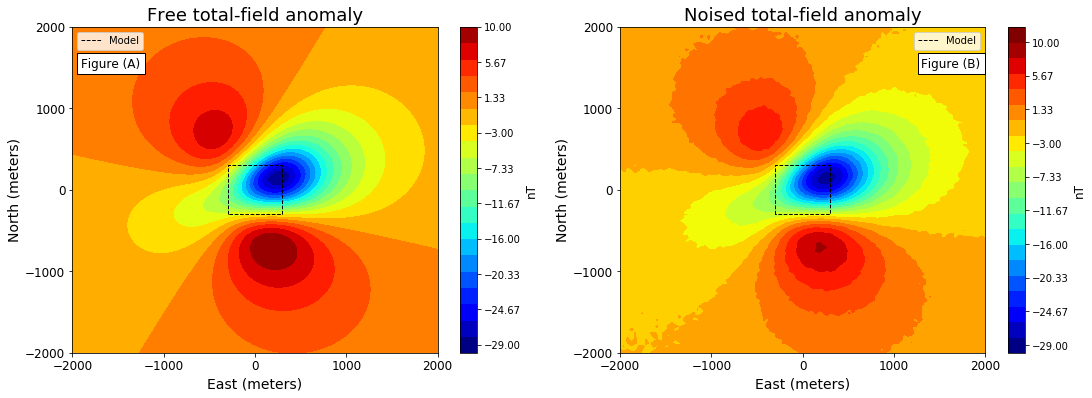

In [12]:
plt.close('all')
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.contourf(Y, X, tf_free, 20, cmap = plt.cm.jet)
draw_prism(area, linewidth=1, label = 'Model', xy2ne=True)
plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Free total-field anomaly', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_clim(cmin, cmax)
cb.set_ticks(np.linspace(int(cmin), int(cmax), 10))
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 2)

plt.subplot(1, 2, 2)
plt.contourf(Y, X, tf_noisy, 20, cmap = plt.cm.jet)
draw_prism(area, linewidth=1, label = 'Model', xy2ne=True)
plt.text(1300., 1500., 'Figure (B)', fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Noised total-field anomaly', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_clim(cmin, cmax)
cb.set_ticks(np.linspace(int(cmin), int(cmax), 10))
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 1)
#plt.savefig('figs/figure1-anomaly.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [13]:
from codes.statistical import cccoef # correlation coefficient
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

In [14]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values
#inc_pos = np.linspace(10., 91., 181)
#inc_neg = np.linspace(-90., -9., 181)
#dec = np.linspace(-180., 180., 721.)
Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [15]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [16]:
# Correlation for positive interval
for i in range(ni):    
    for j in range(nd):
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

codes\auxiliars.py:182: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [17]:
# Correlation for negative interval
for i in range(ni):    
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)

In [18]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    -0.6328
Maximum:    0.0361
Mean value: -0.2891
Variation:  0.6688

Correlacao (inclinacao negativa)
Minimum:    -0.0361
Maximum:    0.6328
Mean value: 0.2881
Variation:  0.6688


In [19]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 10.0
Declination: 12.0

Minima correlacao:
Inclination: 21.0
Declination: -165.0


In [20]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -21.0
Declination: 15.0

Minima correlacao:
Inclination: -10.0
Declination: -168.0


In [21]:
# True values
print 'True inclination:', incs
print 'True declination:', decs

True inclination: -15.0
True declination: 8.0


C:\Users\nelso\Anaconda2\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


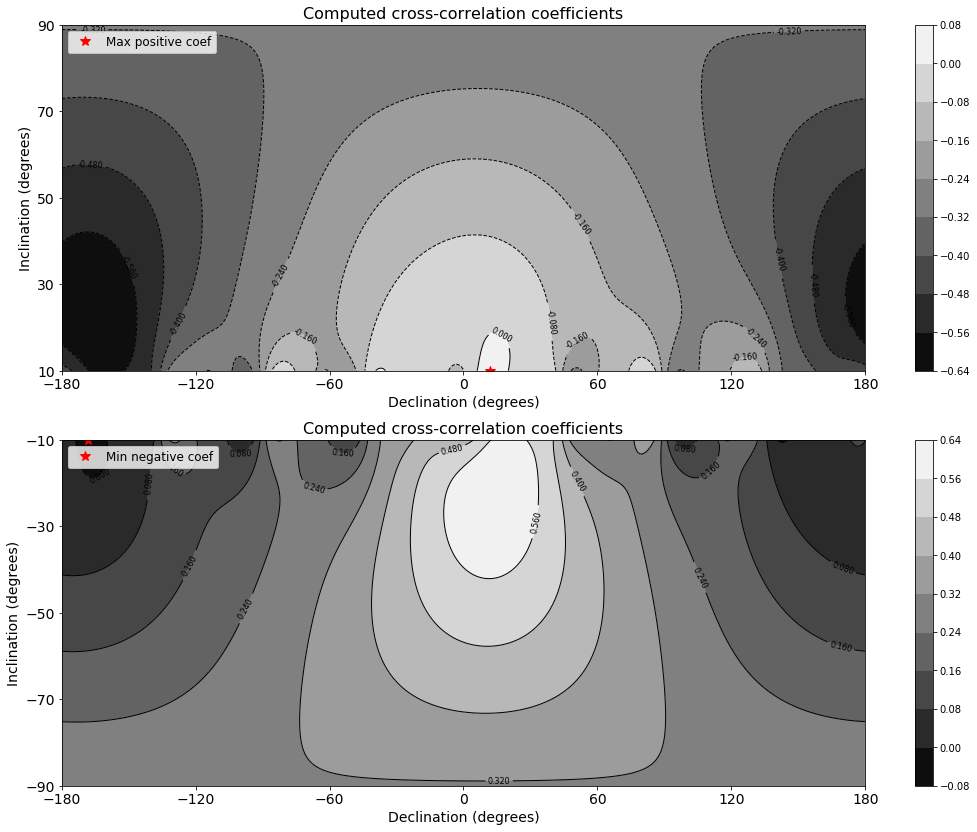

In [22]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('figs/figure3-correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()